In [26]:
import pandas as pd
import matplotlib.pyplot as plt
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')



In [2]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [12]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.831740933244335

In [20]:
# pairwise correlation
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

mpg_data.drop(columns=['model_year', 'origin']).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000


In [29]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.78,-0.8,-0.78,-0.83,0.42
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.51
displacement,-0.8,0.95,1.0,0.9,0.93,-0.54
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69
weight,-0.83,0.9,0.93,0.86,1.0,-0.42
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.0


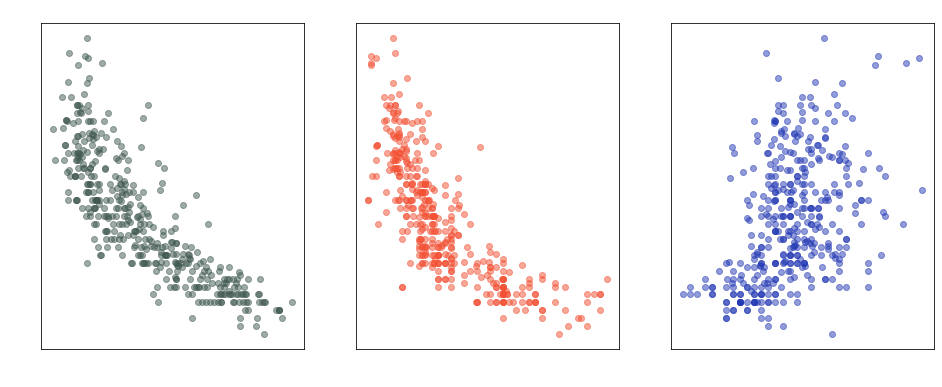

In [57]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)


ax=ax.flatten()

cols = ['weight', 'horsepower', 'acceleration']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('MPG',color= 'white')
    i.scatter(mpg_data[cols[j]], mpg_data['mpg'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j],color= 'white')
    i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2),color= 'white')
    i.tick_params(colors= 'white')
    j+=1

plt.show()